# CMSE 201 Final Project

<font size= '4'> **Sania Sinha** </font>    
**Dr. Hamerski**     
**CMSE 201 002**    
**Dec 8, 2021**     

# ANALYZING DROP OUT RATES IN INDIAN SCHOOLS

## Background and Motivation

Indian primary and secondary schools face a long surviving problem of drop-out students. With a literacy rate of about 74%, India has the largest population of illiterate adults and school drop-outs are a serious concern, especially among females, where the literacy rate stands at about only 65%.    
       
This project is an attempt to look at and analyze some of the factors that affect drop-out rates across Indian schools. It also takes a look at how these factors affect a particular sex, since there seems to be a very distinct disparity between male and female literacy rates.   
This project aims to answer the following questions:    
- Which factors have a steady and significant effect on school drop-out rates and how have they changed over the years?
- How do the gross enrollment ratios and drop-out rates vary across males and females?

## Methodology

This project uses Python with Jupyter notebooks to analyze data (in form of csv files, sourced from Kaggle.com) with the help of libraries like numpy, pandas and matplotlib.

In [1]:
# All imports
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading in the dataset that contains drop-out ratios for different states of India over the years 2012-2015 across various school levels

In [2]:
# Reading in first dataset
# Drop out rates across 2012-2015
df1 = pd.read_csv('dropout-ratio-2012-2015.csv')
df1.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


Separating the data for the different years

In [3]:
drop1213 = df1[df1['year'] == '2012-13'] # data for 2012-13
drop1213.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
7,Arunachal Pradesh,2012-13,15.84,14.44,15.16,5.86,9.06,7.47,13.99,11.77,12.93,7.85,2.14,5.11
9,Assam,2012-13,7.02,5.46,6.24,7.89,6.55,7.2,25.65,27.79,26.77,4.87,4.5,4.69
12,Bihar,2012-13,NR,NR,NR,NR,NR,NR,29.11,31.28,30.14,NR,NR,NR


In [4]:
drop1314 = df1[df1['year'] == '2013-14'] # data for 2013-14
drop1314.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79
6,Arunachal Pradesh,2013-14,11.54,10.22,10.89,4.44,6.74,5.59,16.08,12.75,14.49,18.57,15.49,17.07
10,Assam,2013-14,8.19,6.68,7.44,7.6,6.54,7.05,28.59,32.1,30.43,7.62,6.83,7.24
13,Bihar,2013-14,2.38,1.79,2.09,2.77,3.19,2.98,24.67,26.05,25.33,NR,NR,NR


In [5]:
drop1415 = df1[df1['year'] == '2014-15'] # data for 2014-15
drop1415.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
5,Andhra Pradesh,2014-15,6.57,6.89,6.72,5.09,5.32,5.2,15.81,15.6,15.71,NR,NR,NR
8,Arunachal Pradesh,2014-15,11.51,10.09,10.82,5.31,8.08,6.71,18.33,15.81,17.11,19.37,17.44,18.42
11,Assam,2014-15,16.07,14.65,15.36,10.45,10.56,10.51,24.64,29.28,27.06,NR,NR,NR
14,Bihar,2014-15,0.35,NR,NR,4.14,4.01,4.08,25.21,26.62,25.9,NR,NR,NR


Cleaning the data for values that are unavailable so that it can be easily plotted

In [6]:
# dropping rows where the data is not recorded
drop1213_hs = drop1213.drop(drop1213.index[drop1213['HrSecondary_Total'] == 'NR'])
drop1213_hs.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
7,Arunachal Pradesh,2012-13,15.84,14.44,15.16,5.86,9.06,7.47,13.99,11.77,12.93,7.85,2.14,5.11
9,Assam,2012-13,7.02,5.46,6.24,7.89,6.55,7.2,25.65,27.79,26.77,4.87,4.5,4.69
15,Chandigarh,2012-13,NR,NR,NR,NR,0.88,0.1,NR,NR,NR,16.32,10.09,13.65


In [7]:
# dropping rows where the data is not recorded
drop1213_p = drop1213.drop(drop1213.index[drop1213['Primary_Total'] == 'NR'])
drop1213_p.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
7,Arunachal Pradesh,2012-13,15.84,14.44,15.16,5.86,9.06,7.47,13.99,11.77,12.93,7.85,2.14,5.11
9,Assam,2012-13,7.02,5.46,6.24,7.89,6.55,7.2,25.65,27.79,26.77,4.87,4.5,4.69
18,Chhattisgarh,2012-13,4.24,4.05,4.14,6.09,4.73,5.42,14.82,14.89,14.86,NR,NR,NR


In [8]:
# dropping rows where the data is not recorded
drop1314_p = drop1314.drop(drop1314.index[drop1314['Primary_Total'] == 'NR'])
drop1314_p.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79
6,Arunachal Pradesh,2013-14,11.54,10.22,10.89,4.44,6.74,5.59,16.08,12.75,14.49,18.57,15.49,17.07
10,Assam,2013-14,8.19,6.68,7.44,7.6,6.54,7.05,28.59,32.1,30.43,7.62,6.83,7.24
13,Bihar,2013-14,2.38,1.79,2.09,2.77,3.19,2.98,24.67,26.05,25.33,NR,NR,NR


In [9]:
# dropping rows where the data is not recorded
drop1415_p = drop1415.drop(drop1415.index[drop1415['Primary_Total'] == 'NR'])
drop1415_p.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
5,Andhra Pradesh,2014-15,6.57,6.89,6.72,5.09,5.32,5.2,15.81,15.6,15.71,NR,NR,NR
8,Arunachal Pradesh,2014-15,11.51,10.09,10.82,5.31,8.08,6.71,18.33,15.81,17.11,19.37,17.44,18.42
11,Assam,2014-15,16.07,14.65,15.36,10.45,10.56,10.51,24.64,29.28,27.06,NR,NR,NR
20,Chhattisgarh,2014-15,3.08,2.74,2.91,6.47,5.22,5.85,22.62,19.92,21.26,1.37,4.14,2.76


Correcting the data type to float so that it can be plotted with correct axis values

In [10]:
# Storing the columns as float type
drop1213_p['Primary_Total'] = drop1213_p['Primary_Total'].astype(float)
drop1314_p['Primary_Total'] = drop1314_p['Primary_Total'].astype(float)
drop1415_p['Primary_Total'] = drop1415_p['Primary_Total'].astype(float)

In [11]:
# dropping rows where the data is not recorded
drop1213_up = drop1213.drop(drop1213.index[drop1213['Upper Primary_Total'] == 'NR'])
drop1213_up.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
7,Arunachal Pradesh,2012-13,15.84,14.44,15.16,5.86,9.06,7.47,13.99,11.77,12.93,7.85,2.14,5.11
9,Assam,2012-13,7.02,5.46,6.24,7.89,6.55,7.2,25.65,27.79,26.77,4.87,4.5,4.69
15,Chandigarh,2012-13,NR,NR,NR,NR,0.88,0.1,NR,NR,NR,16.32,10.09,13.65


In [12]:
# dropping rows where the data is not recorded
drop1314_up = drop1314.drop(drop1314.index[drop1314['Upper Primary_Total'] == 'NR'])
drop1314_up.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79
6,Arunachal Pradesh,2013-14,11.54,10.22,10.89,4.44,6.74,5.59,16.08,12.75,14.49,18.57,15.49,17.07
10,Assam,2013-14,8.19,6.68,7.44,7.6,6.54,7.05,28.59,32.1,30.43,7.62,6.83,7.24
13,Bihar,2013-14,2.38,1.79,2.09,2.77,3.19,2.98,24.67,26.05,25.33,NR,NR,NR


In [13]:
# dropping rows where the data is not recorded
drop1415_up = drop1415.drop(drop1415.index[drop1415['Upper Primary_Total'] == 'NR'])
drop1415_up.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
5,Andhra Pradesh,2014-15,6.57,6.89,6.72,5.09,5.32,5.2,15.81,15.6,15.71,NR,NR,NR
8,Arunachal Pradesh,2014-15,11.51,10.09,10.82,5.31,8.08,6.71,18.33,15.81,17.11,19.37,17.44,18.42
11,Assam,2014-15,16.07,14.65,15.36,10.45,10.56,10.51,24.64,29.28,27.06,NR,NR,NR
14,Bihar,2014-15,0.35,NR,NR,4.14,4.01,4.08,25.21,26.62,25.9,NR,NR,NR


In [14]:
# Storing the columns as float type
drop1213_up['Upper Primary_Total'] = drop1213_up['Upper Primary_Total'].astype(float)
drop1314_up['Upper Primary_Total'] = drop1314_up['Upper Primary_Total'].astype(float)
drop1415_up['Upper Primary_Total'] = drop1415_up['Upper Primary_Total'].astype(float)

In [15]:
# dropping rows where the data is not recorded
drop1314_hs = drop1314.drop(drop1314.index[drop1314['HrSecondary_Total'] == 'NR'])
drop1314_hs.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79
6,Arunachal Pradesh,2013-14,11.54,10.22,10.89,4.44,6.74,5.59,16.08,12.75,14.49,18.57,15.49,17.07
10,Assam,2013-14,8.19,6.68,7.44,7.6,6.54,7.05,28.59,32.1,30.43,7.62,6.83,7.24
16,Chandigarh,2013-14,NR,NR,NR,0.72,1.55,1.08,NR,NR,NR,13.24,8.49,11.28


In [16]:
# dropping rows where the data is not recorded
drop1415_hs = drop1415.drop(drop1415.index[drop1415['HrSecondary_Total'] == 'NR'])
drop1415_hs.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
8,Arunachal Pradesh,2014-15,11.51,10.09,10.82,5.31,8.08,6.71,18.33,15.81,17.11,19.37,17.44,18.42
17,Chandigarh,2014-15,NR,NR,NR,0.01,0.96,0.44,NR,NR,NR,12.1,8.41,10.55
20,Chhattisgarh,2014-15,3.08,2.74,2.91,6.47,5.22,5.85,22.62,19.92,21.26,1.37,4.14,2.76
23,Dadra & Nagar Haveli,2014-15,1.6,1.31,1.47,3.7,4.4,4.02,18.19,15.08,16.77,13.45,4.77,9.47


In [17]:
# Storing the columns as float type
drop1213_hs['HrSecondary_Total'] = drop1213_hs['HrSecondary_Total'].astype(float)
drop1314_hs['HrSecondary_Total'] = drop1314_hs['HrSecondary_Total'].astype(float)
drop1415_hs['HrSecondary_Total'] = drop1415_hs['HrSecondary_Total'].astype(float)

Plotting drop-out rates across various school levels in each school year

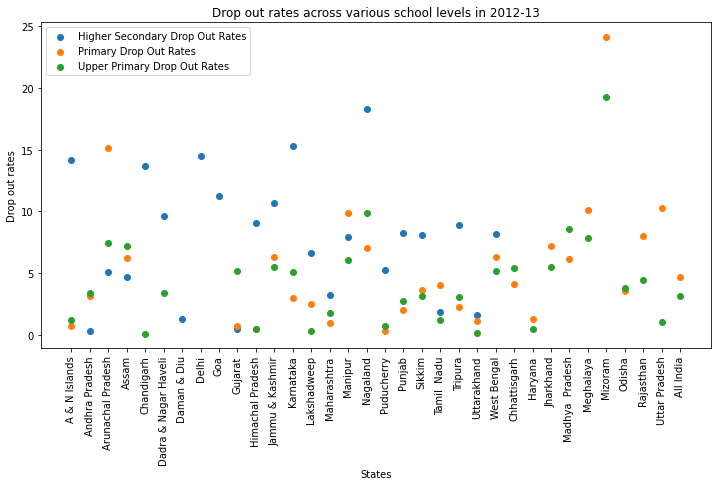

In [18]:
# Creating a plot of drop-out rates
plt.figure(figsize=(12,6))
plt.scatter(drop1213_hs['State_UT'], drop1213_hs['HrSecondary_Total'], label='Higher Secondary Drop Out Rates')
plt.scatter(drop1213_p['State_UT'], drop1213_p['Primary_Total'], label='Primary Drop Out Rates')
plt.scatter(drop1213_up['State_UT'], drop1213_up['Upper Primary_Total'], label='Upper Primary Drop Out Rates')
plt.legend()
plt.xticks(rotation=90)
plt.title('Drop out rates across various school levels in 2012-13')
plt.xlabel('States')
plt.ylabel('Drop out rates')
plt.show()

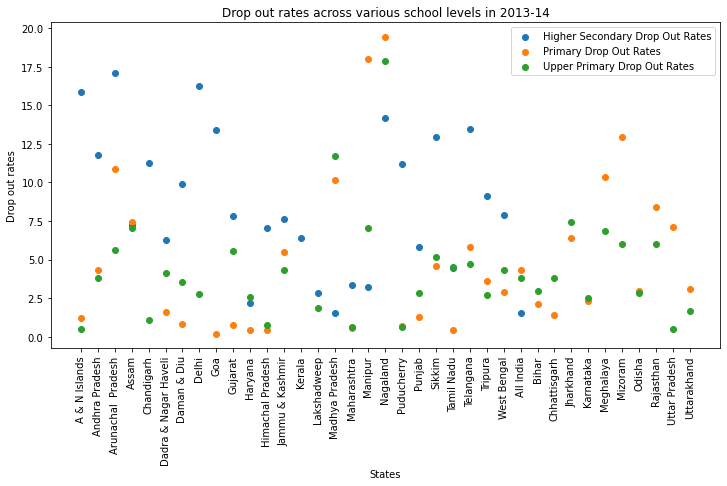

In [19]:
# Creating a plot of drop-out rates
plt.figure(figsize=(12,6))
plt.scatter(drop1314_hs['State_UT'], drop1314_hs['HrSecondary_Total'], label='Higher Secondary Drop Out Rates')
plt.scatter(drop1314_p['State_UT'], drop1314_p['Primary_Total'], label='Primary Drop Out Rates')
plt.scatter(drop1314_up['State_UT'], drop1314_up['Upper Primary_Total'], label='Upper Primary Drop Out Rates')
plt.legend()
plt.xticks(rotation=90)
plt.title('Drop out rates across various school levels in 2013-14')
plt.xlabel('States')
plt.ylabel('Drop out rates')
plt.show()

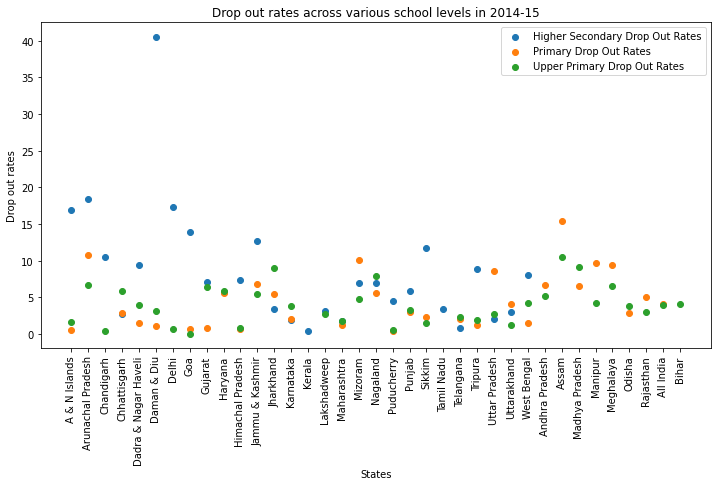

In [20]:
# Creating a plot of drop-out rates
plt.figure(figsize=(12,6))
plt.scatter(drop1415_hs['State_UT'], drop1415_hs['HrSecondary_Total'], label='Higher Secondary Drop Out Rates')
plt.scatter(drop1415_p['State_UT'], drop1415_p['Primary_Total'], label='Primary Drop Out Rates')
plt.scatter(drop1415_up['State_UT'], drop1415_up['Upper Primary_Total'], label='Upper Primary Drop Out Rates')
plt.legend()
plt.xticks(rotation=90)
plt.title('Drop out rates across various school levels in 2014-15')
plt.xlabel('States')
plt.ylabel('Drop out rates')
plt.show()

Separating and cleaning data specific to girls and boys across different school levels for each school year and changing the values to the correct datatype

In [21]:
# Cleaning the data for boys

drop1213_hsb = drop1213.drop(drop1213.index[drop1213['HrSecondary_Boys'] == 'NR'])
drop1314_hsb = drop1314.drop(drop1314.index[drop1314['HrSecondary_Boys'] == 'NR'])
drop1415_hsb = drop1415.drop(drop1415.index[drop1415['HrSecondary_Boys'] == 'NR'])

drop1213_hsb['HrSecondary_Boys'] = drop1213_hsb['HrSecondary_Boys'].astype(float)
drop1314_hsb['HrSecondary_Boys'] = drop1314_hsb['HrSecondary_Boys'].astype(float)
drop1415_hsb['HrSecondary_Boys'] = drop1415_hsb['HrSecondary_Boys'].astype(float)

drop1213_pb = drop1213.drop(drop1213.index[drop1213['Primary_Boys'] == 'NR'])
drop1314_pb = drop1314.drop(drop1314.index[drop1314['Primary_Boys'] == 'NR'])
drop1415_pb = drop1415.drop(drop1415.index[drop1415['Primary_Boys'] == 'NR'])

drop1213_pb['Primary_Boys'] = drop1213_pb['Primary_Boys'].astype(float)
drop1314_pb['Primary_Boys'] = drop1314_pb['Primary_Boys'].astype(float)
drop1415_pb['Primary_Boys'] = drop1415_pb['Primary_Boys'].astype(float)
drop1213_upb = drop1213.drop(drop1213.index[drop1213['Upper Primary_Boys'] == 'NR'] | drop1213.index[drop1213['Upper Primary_Boys'] == 'Uppe_r_Primary'])
drop1314_upb = drop1314.drop(drop1314.index[drop1314['Upper Primary_Boys'] == 'NR'])
drop1415_upb = drop1415.drop(drop1415.index[drop1415['Upper Primary_Boys'] == 'NR'])

drop1213_upb['Upper Primary_Boys'] = drop1213_upb['Upper Primary_Boys'].astype(float)
drop1314_upb['Upper Primary_Boys'] = drop1314_upb['Upper Primary_Boys'].astype(float)
drop1415_upb['Upper Primary_Boys'] = drop1415_upb['Upper Primary_Boys'].astype(float)

drop1213_sb = drop1213.drop(drop1213.index[drop1213['Secondary _Boys'] == 'NR'])
drop1314_sb = drop1314.drop(drop1314.index[drop1314['Secondary _Boys'] == 'NR'])
drop1415_sb = drop1415.drop(drop1415.index[drop1415['Secondary _Boys'] == 'NR'])

drop1213_sb['Secondary _Boys'] = drop1213_sb['Secondary _Boys'].astype(float)
drop1314_sb['Secondary _Boys'] = drop1314_sb['Secondary _Boys'].astype(float)
drop1415_sb['Secondary _Boys'] = drop1415_sb['Secondary _Boys'].astype(float)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead


Plotting drop-out rates for boys across different school levels for each school year

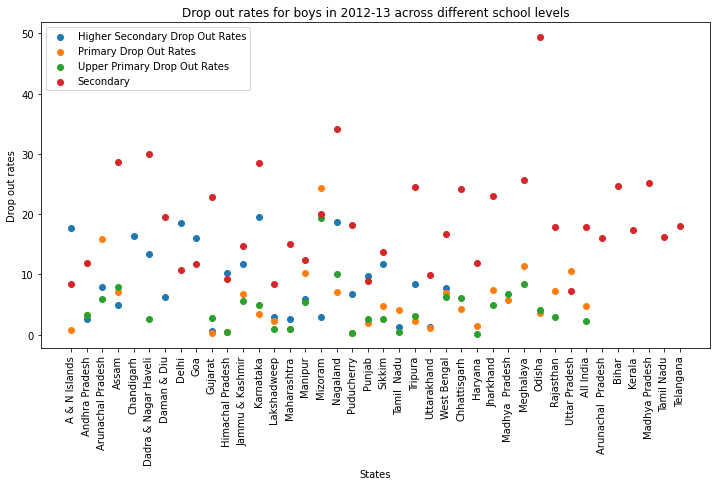

In [22]:
#Creating the plot for data of boys
plt.figure(figsize=(12,6))
plt.scatter(drop1213_hsb['State_UT'], drop1213_hsb['HrSecondary_Boys'], label='Higher Secondary Drop Out Rates')
plt.scatter(drop1213_pb['State_UT'], drop1213_pb['Primary_Boys'], label='Primary Drop Out Rates')
plt.scatter(drop1213_upb['State_UT'], drop1213_upb['Upper Primary_Boys'], label='Upper Primary Drop Out Rates')
plt.scatter(drop1314_sb['State_UT'], drop1314_sb['Secondary _Boys'], label='Secondary')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Drop out rates')
plt.title('Drop out rates for boys in 2012-13 across different school levels')
plt.show()

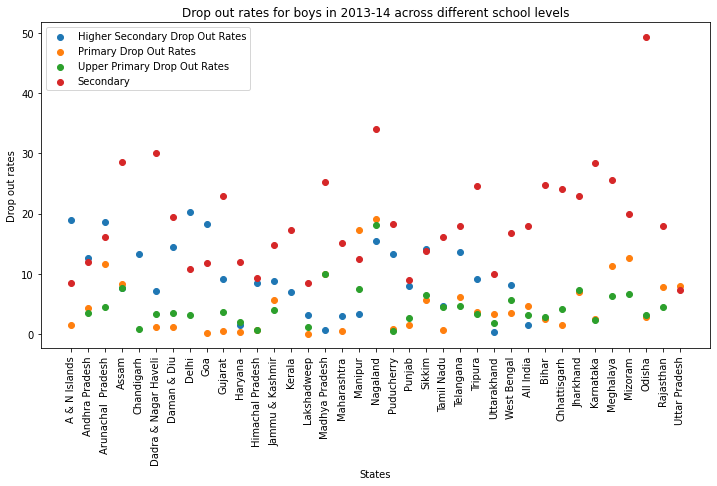

In [23]:
#Creating the plot for data of boys
plt.figure(figsize=(12,6))
plt.scatter(drop1314_hsb['State_UT'], drop1314_hsb['HrSecondary_Boys'], label='Higher Secondary Drop Out Rates')
plt.scatter(drop1314_pb['State_UT'], drop1314_pb['Primary_Boys'], label='Primary Drop Out Rates')
plt.scatter(drop1314_upb['State_UT'], drop1314_upb['Upper Primary_Boys'], label='Upper Primary Drop Out Rates')
plt.scatter(drop1314_sb['State_UT'], drop1314_sb['Secondary _Boys'], label='Secondary')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Drop out rates')
plt.title('Drop out rates for boys in 2013-14 across different school levels')
plt.show()

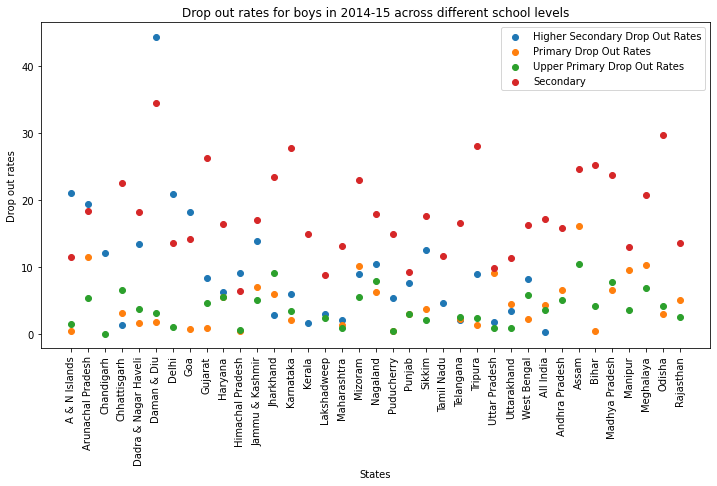

In [24]:
#Creating the plot for data of boys
plt.figure(figsize=(12,6))
plt.scatter(drop1415_hsb['State_UT'], drop1415_hsb['HrSecondary_Boys'], label='Higher Secondary Drop Out Rates')
plt.scatter(drop1415_pb['State_UT'], drop1415_pb['Primary_Boys'], label='Primary Drop Out Rates')
plt.scatter(drop1415_upb['State_UT'], drop1415_upb['Upper Primary_Boys'], label='Upper Primary Drop Out Rates')
plt.scatter(drop1415_sb['State_UT'], drop1415_sb['Secondary _Boys'], label='Secondary')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Drop out rates')
plt.title('Drop out rates for boys in 2014-15 across different school levels')
plt.show()

In [25]:
# Dropping rows where data is not recorded
drop1213_hsg = drop1213.drop(drop1213.index[drop1213['HrSecondary_Girls'] == 'NR'])
drop1314_hsg = drop1314.drop(drop1314.index[drop1314['HrSecondary_Girls'] == 'NR'])
drop1415_hsg = drop1415.drop(drop1415.index[drop1415['HrSecondary_Girls'] == 'NR'])

In [26]:
# Storing the data as type float
drop1213_hsg['HrSecondary_Girls'] = drop1213_hsg['HrSecondary_Girls'].astype(float)
drop1314_hsg['HrSecondary_Girls'] = drop1314_hsg['HrSecondary_Girls'].astype(float)
drop1415_hsg['HrSecondary_Girls'] = drop1415_hsg['HrSecondary_Girls'].astype(float)

In [27]:
# Cleaning thne data for girls
p1213_pg = drop1213.drop(drop1213.index[drop1213['Primary_Girls'] == 'NR'])
drop1314_pg = drop1314.drop(drop1314.index[drop1314['Primary_Girls'] == 'NR'])
drop1415_pg = drop1415.drop(drop1415.index[drop1415['Primary_Girls'] == 'NR'])

drop1213_pg['Primary_Girls'] = drop1213_pg['Primary_Girls'].astype(float)
drop1314_pg['Primary_Girls'] = drop1314_pg['Primary_Girls'].astype(float)
drop1415_pg['Primary_Girls'] = drop1415_pg['Primary_Girls'].astype(float)

NameError: name 'drop1213_pg' is not defined

In [ ]:
# Cleaning thne data for girls
drop1213_upg = drop1213.drop(drop1213.index[drop1213['Upper Primary_Girls'] == 'NR'])
drop1314_upg = drop1314.drop(drop1314.index[drop1314['Upper Primary_Girls'] == 'NR'])
drop1415_upg = drop1415.drop(drop1415.index[drop1415['Upper Primary_Girls'] == 'NR'])

drop1213_upg['Upper Primary_Girls'] = drop1213_upg['Upper Primary_Girls'].astype(float)
drop1314_upg['Upper Primary_Girls'] = drop1314_upg['Upper Primary_Girls'].astype(float)
drop1415_upg['Upper Primary_Girls'] = drop1415_upg['Upper Primary_Girls'].astype(float)

In [ ]:
# Cleaning thne data for girls
drop1213_sg = drop1213.drop(drop1213.index[drop1213['Secondary _Girls'] == 'NR'])
drop1314_sg = drop1314.drop(drop1314.index[drop1314['Secondary _Girls'] == 'NR'])
drop1415_sg = drop1415.drop(drop1415.index[drop1415['Secondary _Girls'] == 'NR'])

drop1213_sg['Secondary _Girls'] = drop1213_sg['Secondary _Girls'].astype(float)
drop1314_sg['Secondary _Girls'] = drop1314_sg['Secondary _Girls'].astype(float)
drop1415_sg['Secondary _Girls'] = drop1415_sg['Secondary _Girls'].astype(float)

Plotting drop-out rates for girls across different school levels for each school year

In [ ]:
# Creating the plot for data of girls
plt.figure(figsize=(12,6))
plt.scatter(drop1213_hsg['State_UT'], drop1213_hsg['HrSecondary_Girls'], label='Higher Secondary Drop Out Rates')
plt.scatter(drop1213_pg['State_UT'], drop1213_pg['Primary_Girls'], label='Primary Drop Out Rates')
plt.scatter(drop1213_upg['State_UT'], drop1213_upg['Upper Primary_Girls'], label='Upper Primary Drop Out Rates')
plt.scatter(drop1314_sg['State_UT'], drop1314_sg['Secondary _Girls'], label='Secondary')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Drop out rates')
plt.title('Drop out rates for girls in 2012-13 across different school levels')
plt.show()

In [ ]:
# Creating the plot for data of girls
plt.figure(figsize=(12,6))
plt.scatter(drop1314_hsg['State_UT'], drop1314_hsg['HrSecondary_Girls'], label='Higher Secondary Drop Out Rates')
plt.scatter(drop1314_pg['State_UT'], drop1314_pg['Primary_Girls'], label='Primary Drop Out Rates')
plt.scatter(drop1314_upg['State_UT'], drop1314_upg['Upper Primary_Girls'], label='Upper Primary Drop Out Rates')
plt.scatter(drop1314_sg['State_UT'], drop1314_sg['Secondary _Girls'], label='Secondary')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Drop out rates')
plt.title('Drop out rates for girls in 2013-14 across different school levels')
plt.show()

In [ ]:
# Creating the plot for data of girls
plt.figure(figsize=(12,6))
plt.scatter(drop1415_hsg['State_UT'], drop1415_hsg['HrSecondary_Girls'], label='Higher Secondary Drop Out Rates')
plt.scatter(drop1415_pg['State_UT'], drop1415_pg['Primary_Girls'], label='Primary Drop Out Rates')
plt.scatter(drop1415_upg['State_UT'], drop1415_upg['Upper Primary_Girls'], label='Upper Primary Drop Out Rates')
plt.scatter(drop1314_sg['State_UT'], drop1314_sg['Secondary _Girls'], label='Secondary')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Drop out rates')
plt.title('Drop out rates for girls in 2014-15 across different school levels')
plt.show()

### Loading in the next dataset that contains record of gross enrolment ratios at different school levels across different states of India from 2013-2016

In [ ]:
# Reading in second dataset
# Gross enrollment ratios across 2013-2016
df2 = pd.read_csv('gross-enrollment-ratio-2013-2016.csv')
df2.head()

Separating the data for each year

In [ ]:
enrol1314 = df2[df2['Year'] == '2013-14'] # data for 2013-14
enrol1314.head()

Filtering data that is unavailable to make it easy to plot it

In [ ]:
# Dropping rows where the data is not recorded
enrol1314_p = enrol1314.drop(enrol1314.index[enrol1314['Primary_Total'] == 'NR'])
enrol1314_p.head()

In [ ]:
# Dropping rows where the data is not recorded
enrol1314_up = enrol1314.drop(enrol1314.index[enrol1314['Upper_Primary_Total'] == 'NR'])
enrol1314_up.head()

In [ ]:
# Dropping rows where the data is not recorded
enrol1314_s = enrol1314.drop(enrol1314.index[enrol1314['Secondary_Total'] == 'NR'])
enrol1314_s.head()

In [ ]:
# Dropping rows where the data is not recorded
enrol1314_hs = enrol1314.drop(enrol1314.index[enrol1314['Higher_Secondary_Total'] == 'NR'])
enrol1314_hs.head()

To discern a trend in the gross enrolment ratios, a trend line has been drawn. Degree 2 has been selected because it most closely fitted the pattern accordingly to human eye evaluation. It is merely to identify a pattern to facilitate drawing conclusions and does not intend to predict a very specific pattern or algorithm in change of values

**Higher Secondary has been excluded from the following graphs because it has some states for which the data is unavailable**

In [ ]:
z = np.polyfit(enrol1314_p.index, enrol1314_p['Primary_Total'],2)
f = np.poly1d(z)

In [ ]:
z2 = np.polyfit(enrol1314_up.index, enrol1314_up['Upper_Primary_Total'],2)
f2 = np.poly1d(z2)

In [ ]:
z3 = np.polyfit(enrol1314_s.index, enrol1314_s['Secondary_Total'],2)
f3 = np.poly1d(z3)

Plotting gross enrolment ratios across various school levels with trend lines to make rough predictions

In [ ]:
# Creating plot with trend lines for gross enrolment ratios
plt.figure(figsize=(12,6))
plt.scatter(enrol1314_p['State_UT'], enrol1314_p['Primary_Total'], label='Primary')
plt.scatter(enrol1314_up['State_UT'], enrol1314_up['Upper_Primary_Total'], label='Upper Primary')
plt.scatter(enrol1314_s['State_UT'], enrol1314_s['Secondary_Total'], label='Secondary')
# plt.scatter(enrol1314_hs['State_UT'], enrol1314_hs['Higher_Secondary_Total'], label='Higher Secondary')

plt.plot(enrol1314_p['State_UT'], f(enrol1314_p.index), '--')
plt.plot(enrol1314_up['State_UT'], f2(enrol1314_up.index), '--')
plt.plot(enrol1314_s['State_UT'], f3(enrol1314_s.index), '--')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Gross Enrollment Ratio')
plt.title('Gross Enrollment Ratios in 2013-14 across different school levels')
plt.show()

The exact process as above has been repeated for the following years

In [ ]:
enrol1415 = df2[df2['Year'] == '2014-15']
enrol1516 = df2[df2['Year'] == '2015-16']

In [ ]:
# Cleaning data
enrol1415_p = enrol1415.drop(enrol1415.index[enrol1415['Primary_Total'] == 'NR'])
enrol1516_p = enrol1516.drop(enrol1516.index[enrol1516['Primary_Total'] == 'NR'])

In [ ]:
enrol1415_up = enrol1415.drop(enrol1415.index[enrol1415['Upper_Primary_Total'] == 'NR'])
enrol1516_up = enrol1516.drop(enrol1516.index[enrol1516['Upper_Primary_Total'] == 'NR'])

In [ ]:
enrol1415_s = enrol1415.drop(enrol1415.index[enrol1415['Secondary_Total'] == 'NR'])
enrol1516_s = enrol1516.drop(enrol1516.index[enrol1516['Secondary_Total'] == 'NR'])

In [ ]:
enrol1415_hs = enrol1415.drop(enrol1415.index[enrol1415['Higher_Secondary_Total'] == 'NR'])
enrol1516_hs = enrol1516.drop(enrol1516.index[enrol1516['Higher_Secondary_Total'] == 'NR'])

In [ ]:
# Finding parameters and function for generating trend line of data
zz = np.polyfit(enrol1415_p.index, enrol1415_p['Primary_Total'],2)
ff = np.poly1d(zz)
zz2 = np.polyfit(enrol1415_up.index, enrol1415_up['Upper_Primary_Total'],2)
ff2 = np.poly1d(zz2)
zz3 = np.polyfit(enrol1415_s.index, enrol1415_s['Secondary_Total'],2)
ff3 = np.poly1d(zz3)

In [ ]:
# Creating plot with trend lines for gross enrolment ratios
plt.figure(figsize=(12,6))
plt.scatter(enrol1415_p['State_UT'], enrol1415_p['Primary_Total'], label='Primary')
plt.scatter(enrol1415_up['State_UT'], enrol1415_up['Upper_Primary_Total'], label='Upper Primary')
plt.scatter(enrol1415_s['State_UT'], enrol1415_s['Secondary_Total'], label='Secondary')
# plt.scatter(enrol1314_hs['State_UT'], enrol1314_hs['Higher_Secondary_Total'], label='Higher Secondary')

plt.plot(enrol1415_p['State_UT'], ff(enrol1415_p.index), '--')
plt.plot(enrol1415_up['State_UT'], ff2(enrol1415_up.index), '--')
plt.plot(enrol1415_s['State_UT'], ff3(enrol1415_s.index), '--')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Gross Enrollment Ratio')
plt.title('Gross Enrollment Ratios in 2014-15 across different school levels')
plt.show()

In [ ]:
# Finding parameters and function for generating trend line of data
zzz = np.polyfit(enrol1516_p.index, enrol1516_p['Primary_Total'],2)
fff = np.poly1d(zzz)
zzz2 = np.polyfit(enrol1516_up.index, enrol1516_up['Upper_Primary_Total'],2)
fff2 = np.poly1d(zzz2)
zzz3 = np.polyfit(enrol1516_s.index, enrol1516_s['Secondary_Total'],2)
fff3 = np.poly1d(zzz3)

In [ ]:
# Creating plot with trend lines for gross enrolment ratios
plt.figure(figsize=(12,6))
plt.scatter(enrol1516_p['State_UT'], enrol1516_p['Primary_Total'], label='Primary')
plt.scatter(enrol1516_up['State_UT'], enrol1516_up['Upper_Primary_Total'], label='Upper Primary')
plt.scatter(enrol1516_s['State_UT'], enrol1516_s['Secondary_Total'], label='Secondary')
# plt.scatter(enrol1314_hs['State_UT'], enrol1314_hs['Higher_Secondary_Total'], label='Higher Secondary')

plt.plot(enrol1516_p['State_UT'], ff(enrol1516_p.index), '--')
plt.plot(enrol1516_up['State_UT'], ff2(enrol1516_up.index), '--')
plt.plot(enrol1516_s['State_UT'], ff3(enrol1516_s.index), '--')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Gross Enrollment Ratio')
plt.title('Gross Enrollment Ratios in 2015-16 across different school levels')
plt.show()

### Loading in the next dataset that contains records of the percentage of schools with computers across various states of India over the years 2013-2016

In [ ]:
# Reading in the third dataset
# containing percentage of schools with computers
df3 = pd.read_csv('percentage-of-schools-with-comps-2013-2016.csv')
df3.head()

Separating the data by each school year

In [ ]:
comp1314 = df3[df3['year'] == '2013-14'] # data for 2013-14
comp1415 = df3[df3['year'] == '2014-15'] # data for 2014-15
comp1516 = df3[df3['year'] == '2015-16'] # data for 2015-16

In [ ]:
comp1314.head()

In [ ]:
comp1415.head()

In [ ]:
comp1516.head()

Cleaning the data which is unavailable

In [ ]:
comp1314 = comp1314.drop(comp1314.index[comp1314['All Schools'] == 'NR'])
comp1415 = comp1415.drop(comp1415.index[comp1415['All Schools'] == 'NR'])
comp1516 = comp1516.drop(comp1516.index[comp1516['All Schools'] == 'NR'])

In [ ]:
comp1314.head()

In [ ]:
comp1415.head()

In [ ]:
comp1516.head()

Plotting the data for each school year

In [ ]:
# Creating plot to compare data across the years
plt.figure(figsize=(12,6))
plt.scatter(comp1314['State_UT'], comp1314['All Schools'], label='2013-14')
plt.scatter(comp1415['State_UT'], comp1415['All Schools'], label='2014-15')
plt.scatter(comp1516['State_UT'], comp1516['All Schools'], label='2015-16')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Percentage of schools with computers')
plt.title('Percentage of schools with computers across 2013-16')
plt.show()

In [ ]:
# Used later
comp1314_p = comp1314.drop(comp1314.index[comp1314['Primary_Only'] == 'NR'])
comp1415_p = comp1415.drop(comp1415.index[comp1415['Primary_Only'] == 'NR'])
comp1516_p = comp1516.drop(comp1516.index[comp1516['Primary_Only'] == 'NR'])

### Loading in the next dataset that contains records of the percentage of schools with electricity across various states of India over the years 2013-2016

In [ ]:
# Reading in the third dataset
# containing percentage of schools with electricity
df4 = pd.read_csv('percentage-of-schools-with-electricity-2013-2016.csv')
df4.head()

Separating the data for each school year

In [ ]:
elec1314 = df4[df4['year'] == '2013-14'] # data for 2013-14
elec1415 = df4[df4['year'] == '2014-15'] # data for 2014-15
elec1516 = df4[df4['year'] == '2015-16'] # data for 2015-16

Cleaning the data which is unavailable

In [ ]:
elec1314 = elec1314.drop(elec1314.index[elec1314['All Schools'] == 'NR'])
elec1415 = elec1415.drop(elec1415.index[elec1415['All Schools'] == 'NR'])
elec1516 = elec1516.drop(elec1516.index[elec1516['All Schools'] == 'NR'])

In [ ]:
elec1314.head()

In [ ]:
elec1415.head()

In [ ]:
elec1516.head()

Plotting the data for each year

In [ ]:
# Creating plot to compare data across the years
plt.figure(figsize=(12,6))
plt.scatter(elec1314['State_UT'], elec1314['All Schools'], label='2013-14')
plt.scatter(elec1415['State_UT'], elec1415['All Schools'], label='2014-15')
plt.scatter(elec1516['State_UT'], elec1516['All Schools'], label='2015-16')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Percentage of schools with electricity')
plt.title('Percentage of schools with electricity across 2013-16')
plt.show()

In [ ]:
# Used subsequently
elec1314_p = elec1314.drop(elec1314.index[elec1314['Primary_Only'] == 'NR'])
elec1415_p = elec1415.drop(elec1415.index[elec1415['Primary_Only'] == 'NR'])
elec1516_p = elec1516.drop(elec1516.index[elec1516['Primary_Only'] == 'NR'])

Comparing gross enrolment ratio and drop-out rates with rsepect to percentage of schools with computers and with electricity across different states of India for primary school level for different school years

In [ ]:
# Creating plot with gross enrolment ratio, drop-out rates, % of schools with electricity and computers
plt.figure(figsize=(12,8))
plt.scatter(elec1314_p['State_UT'], elec1314_p['Primary_Only'], label='% with electricity')
plt.scatter(comp1314_p['State_UT'], comp1314_p['Primary_Only'], label='% with computers')
plt.scatter(enrol1314_p['State_UT'], enrol1314_p['Primary_Total'], label='Primary gross enrollment')
plt.scatter(drop1314_p['State_UT'], drop1314_p['Primary_Total'], label='Primary Drop Out Rates')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('percentage or ratio')
plt.title('Comparison of drop out rates, gross enrollment and % of schools with electricity in 2013-14 for primary schools')
plt.show()

In [ ]:
# Creating plot with gross enrolment ratio, drop-out rates, % of schools with electricity and computers
plt.figure(figsize=(12,8))
plt.scatter(elec1415_p['State_UT'], elec1415_p['Primary_Only'], label='% with electricity')
plt.scatter(comp1415_p['State_UT'], comp1415_p['Primary_Only'], label='% with computers')
plt.scatter(enrol1415_p['State_UT'], enrol1415_p['Primary_Total'], label='Primary gross enrollment')
plt.scatter(drop1415_p['State_UT'], drop1415_p['Primary_Total'], label='Primary Drop Out Rates')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('percentage or ratio')
plt.title('Comparison of drop out rates, gross enrollment and % of schools with electricity in 2014-15 for primary schools')
plt.show()

## Results

With increasing school level, the gross enrolment ratio keeps decreasing which can be seen across all 3 years of observation. The following is the plot for the year 2015-16

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(enrol1516_p['State_UT'], enrol1516_p['Primary_Total'], label='Primary')
plt.scatter(enrol1516_up['State_UT'], enrol1516_up['Upper_Primary_Total'], label='Upper Primary')
plt.scatter(enrol1516_s['State_UT'], enrol1516_s['Secondary_Total'], label='Secondary')
# plt.scatter(enrol1314_hs['State_UT'], enrol1314_hs['Higher_Secondary_Total'], label='Higher Secondary')

plt.plot(enrol1516_p['State_UT'], ff(enrol1516_p.index), '--')
plt.plot(enrol1516_up['State_UT'], ff2(enrol1516_up.index), '--')
plt.plot(enrol1516_s['State_UT'], ff3(enrol1516_s.index), '--')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Gross Enrollment Ratio')
plt.title('Gross Enrollment Ratios in 2015-16 across different school levels')
plt.savefig('gross-enrol.png')
plt.show()

Drop-out rates for boys were higher by 3-5% for most states as can be seen in the plot for the year 2014-15. This might also be linked to the fact that gross enrollment rates for girls are less than that of boys.

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(drop1415_hsb['State_UT'], drop1415_hsb['HrSecondary_Boys'], label='Higher Secondary Drop Out Rates')
plt.scatter(drop1415_pb['State_UT'], drop1415_pb['Primary_Boys'], label='Primary Drop Out Rates')
plt.scatter(drop1415_upb['State_UT'], drop1415_upb['Upper Primary_Boys'], label='Upper Primary Drop Out Rates')
plt.scatter(drop1415_sb['State_UT'], drop1415_sb['Secondary _Boys'], label='Secondary')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Drop out rates')
plt.title('Drop out rates for boys in 2014-15 across different school levels')
plt.savefig('drop-out-boys.png')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(drop1415_hsg['State_UT'], drop1415_hsg['HrSecondary_Girls'], label='Higher Secondary Drop Out Rates')
plt.scatter(drop1415_pg['State_UT'], drop1415_pg['Primary_Girls'], label='Primary Drop Out Rates')
plt.scatter(drop1415_upg['State_UT'], drop1415_upg['Upper Primary_Girls'], label='Upper Primary Drop Out Rates')
plt.scatter(drop1314_sg['State_UT'], drop1314_sg['Secondary _Girls'], label='Secondary')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Drop out rates')
plt.title('Drop out rates for girls in 2014-15 across different school levels')
plt.savefig('drop-out-girls.png')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(drop1415_hsb['State_UT'], drop1415_hsb['HrSecondary_Boys'], label='Higher Secondary Drop Out Rates Boys')
plt.scatter(drop1415_hsg['State_UT'], drop1415_hsg['HrSecondary_Girls'], label='Higher Secondary Drop Out Rates Girls')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Drop out rates')
plt.title('Drop out rates for girls vs boys in 2014-15 across Higher Secondary')
plt.savefig('drop-out-boys-vs-girls-hs.png')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(drop1415_pb['State_UT'], drop1415_pb['Primary_Boys'], label='Primary Drop Out Rates Boys')
plt.scatter(drop1415_pg['State_UT'], drop1415_pg['Primary_Girls'], label='Primary Drop Out Rates Girls')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Drop out rates')
plt.title('Drop out rates for girls vs boys in 2014-15 across Primary')
plt.savefig('drop-out-boys-vs-girls-p.png')
plt.show()

States with a higher percentage of schools with computers and/or electricity mostly have higher gross enrollment rates and lower drop out rates as can be seen in the following graph that compares data from the year 2014-15.

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(elec1415_p['State_UT'], elec1415_p['Primary_Only'], label='% with electricity')
plt.scatter(comp1415_p['State_UT'], comp1415_p['Primary_Only'], label='% with computers')
plt.scatter(enrol1415_p['State_UT'], enrol1415_p['Primary_Total'], label='Primary gross enrollment')
plt.scatter(drop1415_p['State_UT'], drop1415_p['Primary_Total'], label='Primary Drop Out Rates')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('percentage or ratio')
plt.title('Comparison of drop out rates, gross enrollment and % of schools with electricity in 2014-15 for primary schools')
plt.savefig('comparison.png')
plt.show()

The percentage of schools with electricity and computers have been increasing in most states across India with an exception of some states like Jharkhand, Assam or Uttar Pradesh where the percentage has been almost stagnant or the progress has beenn very slow.

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(comp1314['State_UT'], comp1314['All Schools'], label='2013-14')
plt.scatter(comp1415['State_UT'], comp1415['All Schools'], label='2014-15')
plt.scatter(comp1516['State_UT'], comp1516['All Schools'], label='2015-16')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Percentage of schools with computers')
plt.title('Percentage of schools with computers across 2013-16')
plt.savefig('comp.png')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(elec1314['State_UT'], elec1314['All Schools'], label='2013-14')
plt.scatter(elec1415['State_UT'], elec1415['All Schools'], label='2014-15')
plt.scatter(elec1516['State_UT'], elec1516['All Schools'], label='2015-16')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Percentage of schools with electricity')
plt.title('Percentage of schools with electricity across 2013-16')
plt.savefig('elec.png')
plt.show()

## Discussion and Conclusion

### Conclusions
- Gross enrolment ratios in schools decrease with increasing school level. Thus, people progressively stop pursuing education or are less likely to start pursuing it
- Drop-out rates for girls are lower than that of boys by an average of about 3-5% in most states
- Schools having electricity and computers are likely to have better enrolment rates and less drop-out rates
- Percentage of schools with electricity and computers have been increasing over the years for most states in India, barring a few such as Jharkhand, Assam, etc that have been stagnant in this aspect (around 5% over the course of 3 years for most states and even as high as 15-20% in states like Bihar and West Bengal)

    
    
### Obstacles
- Some statistics cannot be conveniently analyzed due to lack of data for certain states
- Some data has been recorded as a string instead of a numeric data type which needed cleaning to be utilized
- Trend lines for some data could not be plotted because there is no specific pattern

### Future Scope
- Many factors like electricity vs girls enrolment, comparison of change in drop-out rates over the years wrt increase in electricity or computers can be analyzed from the available data
- Trend lines for different factors can be experimented with to see if there is a consistency or if a prediction about future values can be made

## References

Nagar, Subham. “Dropout and Gross Enrollment Analysis.” _Kaggle_, Kaggle, 7 Aug. 2020, https://www.kaggle.com/subham07/dropout-and-gross-enrollment-analysis/data. 